# 1) **Introduction/Business Problem:**
   
   Automotive collisions have become a ubiquitous aspect of the modern world.  These collisions result in loss of or lowered quality of life for those involved.  A study by the Department of Transportation's, National Highway Traffic Saftey Administration, placed a $1 trillion annual loss for the US in 2010. Part of this cost is the loss of economic productivity due to traffic-related congestion. Now all of this is not lost economic gain as this accounts for increased vehicle sales, insurance growth, and many other related fields but one area that is nearly all loss is the time we lose sitting in traffic. 
   
   Through a better understanding of the key factors influencing traffic incident's impact on the traffic flow, we can reduce the number of total crashes, benefiting us all. To prevent them however we must first understand and be able to predict them using features like road and weather conditions or infrastructure type involved. If a pattern can be established we can deploy available resources to better combat these conditions. This analysis will be useful to better inform the driver of key areas to be careful and plan their route accordingly as well as decisionmakers on the local level and above on resource allocation. 
   
   ***tldr*******: Traffic has many issues associated with it, the one that effects us the most is traffic. this analysis will aim to better understand an the conditions that make a crash cause a higher traffic load. 

# 2)**Data**
This US-Accident Dataset is a countrywide dataset covering 49 US states. it has 3.5 million individual traffic accidents taking place from February 2016 to December 2019. This data was collected from 3 online sources but we will focus our analysis on the largest, 'Mapquest', to limit errors. The data will be further hemmed in both geospatially and temporarily due to computational limits. This data contains 48 unique observations for each incident. 10 columns related to a description of the incident.9 columns related to location.10 columns on weather conditions of various types. 13 bollen columns related to the type of infrastructure it was associated with. as well as 5 miscellaneous columns and a severity ranking. it is to be noted that unlike most car crash analyses the severity, in this case, is solely related to the length and magnitude of the traffic delay for those in the area.

# **Acknowledgments**
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In Proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import seaborn as sns
import matplotlib.pyplot as plt 

/kaggle/input/us-accidents/US_Accidents_June20.csv


In [3]:
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_June20.csv')

In [4]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [5]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [8]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


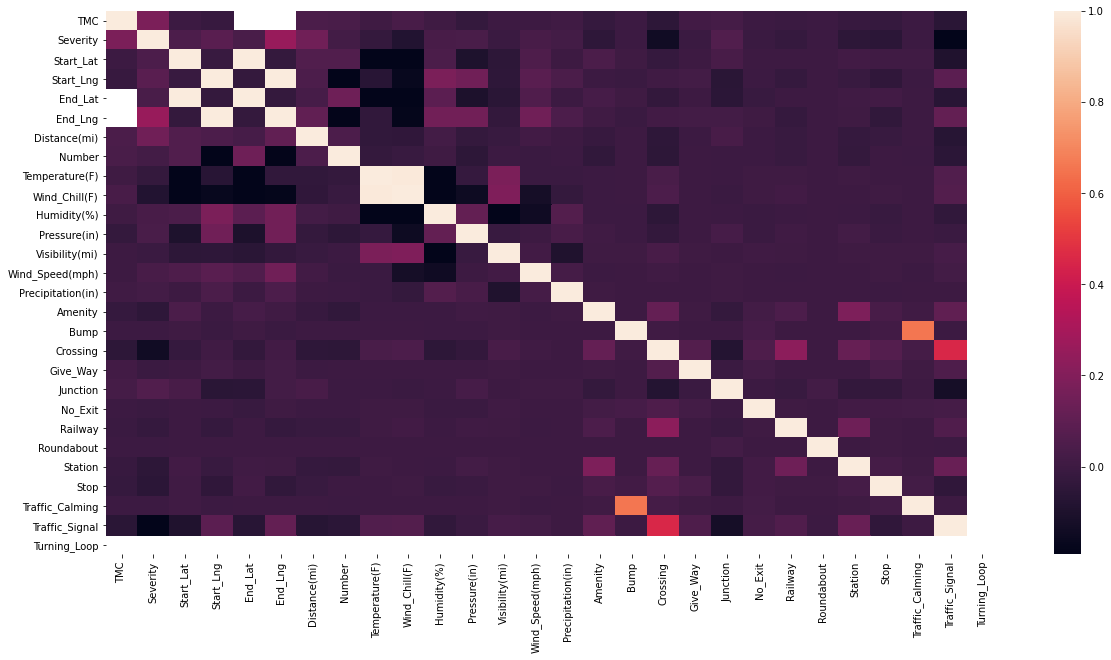

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), robust=True)

In [10]:
df1=df[df['State']=='CT']

In [11]:
df1['County'].unique()
df2=df1[df1['County']=='Fairfield']
df2

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194261,A-194263,MapQuest,201.0,2,2016-11-30 15:56:34,2016-11-30 17:13:41,41.178360,-73.165665,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
194282,A-194284,MapQuest,201.0,2,2016-11-30 17:33:05,2016-11-30 18:02:43,41.121334,-73.406853,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
194334,A-194336,MapQuest,201.0,2,2016-12-01 06:00:57,2016-12-01 06:28:57,41.094528,-73.632339,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
194337,A-194339,MapQuest,244.0,2,2016-12-01 06:25:40,2016-12-01 06:54:48,41.180119,-73.194717,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
194459,A-194461,MapQuest,201.0,3,2016-12-01 11:04:50,2016-12-01 11:34:27,41.417877,-73.290779,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509576,A-3509740,Bing,NaN,2,2019-08-15 14:44:53,2019-08-15 15:14:35,41.106416,-73.416145,41.106416,-73.416145,...,False,False,False,False,False,False,Day,Day,Day,Day
3509605,A-3509769,Bing,NaN,2,2019-08-15 18:21:08,2019-08-15 18:49:22,41.141892,-73.280491,41.142540,-73.270240,...,False,False,False,False,False,False,Day,Day,Day,Day
3509609,A-3509773,Bing,NaN,2,2019-08-15 19:19:32,2019-08-15 19:47:40,41.245661,-73.100105,41.246370,-73.088120,...,False,False,False,False,False,False,Day,Day,Day,Day
3511114,A-3511278,Bing,NaN,2,2019-08-19 17:44:44,2019-08-19 18:13:25,41.101350,-73.570400,41.113210,-73.543170,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
df['Source'].unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)